## 로지스틱회귀

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('data/classification_data.csv')

In [3]:
df

,X1,X2,y
0,-2.056844,-0.752741,0
1,1.760238,1.558517,1
2,-0.447763,-1.554927,1
3,1.008459,0.529517,1
4,0.636547,0.409058,1
...,...,...,...
95,-0.129932,-0.797169,0
96,1.426902,1.244639,1
97,-0.582968,1.630750,1
98,-0.619720,1.630840,0


## 클래스에 따라 색깔 구분하기

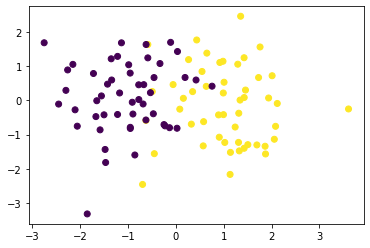

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['X1'],df['X2'],c=df['y'])

## 로지스틱 회귀

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
reg=LogisticRegression()

### 데이터 분할

In [7]:
X = df[['X1','X2']]
y = df['y']
reg.fit(X,y)

LogisticRegression()

## Accuracy

In [8]:
y_pred=reg.predict(X)

In [9]:
y==y_pred

0      True
1      True
2     False
3      True
4      True
      ...  
95    False
96     True
97    False
98     True
99     True
Name: y, Length: 100, dtype: bool

In [10]:
import numpy as np

In [11]:
np.sum(y==y_pred)

89

In [12]:
np.sum(y==y_pred)/y.count()

0.89

## Confusion Matrix

In [13]:
df['y_pred']=y_pred

In [14]:
df

,X1,X2,y,y_pred
0,-2.056844,-0.752741,0,0
1,1.760238,1.558517,1,1
2,-0.447763,-1.554927,1,0
3,1.008459,0.529517,1,1
4,0.636547,0.409058,1,1
...,...,...,...,...
95,-0.129932,-0.797169,0,1
96,1.426902,1.244639,1,1
97,-0.582968,1.630750,1,0
98,-0.619720,1.630840,0,0


### True Positive

In [17]:
tp=len(df[(df['y_pred']==1)&(df['y']==1)])
tp

44

### False Positive

In [18]:
fp=len(df[(df['y_pred']==1)&(df['y']==0)])
fp

5

### True Negative

In [19]:
tn=len(df[(df['y_pred']==0)&(df['y']==0)]) 
tn

45

### False Negative

In [20]:
fn=len(df[(df['y_pred']==0)&(df['y']==1)]) 
fn

6

### Precision

In [21]:
tp/(tp+fp)

0.8979591836734694

### Recall(True Positive Rate)

In [22]:
tp/(tp+fn)

0.88

### False Positive Rate

In [23]:
fp/(fp+tn)

0.1

## sklearn을 이용한 confusion matrix 구하기

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y,y_pred)

array([[45,  5],
       [ 6, 44]])

## decision threashold에 따라 달라지는 예측값 확인

In [52]:
X.shape

(100, 2)

In [57]:
# parameter X : (n_sample, n_features)
# 현재 X는 100개의 데이터, feature는 2개
reg.predict_proba(X)

# return : 각 데이터가 [0으로 분류될 확률, 1로 분류될 확률] 

array([[9.90204636e-01, 9.79536428e-03],
       [2.16034429e-02, 9.78396557e-01],
       [6.01220904e-01, 3.98779096e-01],
       [8.59905428e-02, 9.14009457e-01],
       [1.81847933e-01, 8.18152067e-01],
       [2.31471531e-02, 9.76852847e-01],
       [8.01536679e-02, 9.19846332e-01],
       [5.28638688e-03, 9.94713613e-01],
       [9.77531302e-01, 2.24686977e-02],
       [3.84792683e-01, 6.15207317e-01],
       [9.41969580e-01, 5.80304202e-02],
       [7.59873010e-02, 9.24012699e-01],
       [9.65035530e-01, 3.49644700e-02],
       [6.63214901e-01, 3.36785099e-01],
       [8.71347465e-01, 1.28652535e-01],
       [4.27442195e-03, 9.95725578e-01],
       [5.57538943e-01, 4.42461057e-01],
       [5.86839648e-03, 9.94131604e-01],
       [1.10591010e-01, 8.89408990e-01],
       [3.84522870e-01, 6.15477130e-01],
       [1.42199788e-01, 8.57800212e-01],
       [9.36857280e-01, 6.31427205e-02],
       [9.96690025e-01, 3.30997536e-03],
       [2.83124745e-02, 9.71687526e-01],
       [5.814663

In [58]:
# th의 default를 0.5로 하는 함수
def predict_th(logreg, th=0.5):
    result=[]
    for i in logreg.predict_proba(X)[:,1]:
        if i>th:
            result.append(1)
        else:
            result.append(0)
    return np.array(result)

y_hat=predict_th(reg,0.8)
y_hat

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [59]:
confusion_matrix(y,y_hat)

array([[49,  1],
       [14, 36]])

## ROC_AUC

In [61]:
def get_tpr_fpr(logreg, th, y):
    y_hat = predict_th(logreg,th)
    cm = confusion_matrix(y,y_hat)
    tp,fp,tn,fn = cm[1][1],cm[0][1],cm[0][0],cm[1][0]
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    return tpr,fpr
    

In [62]:
tpr_result=[]
fpr_result=[]

for th in np.arange(0, 1, 0.05):
    tpr,fpr=get_tpr_fpr(reg,th,y)
    tpr_result.append(tpr)
    fpr_result.append(fpr)
    

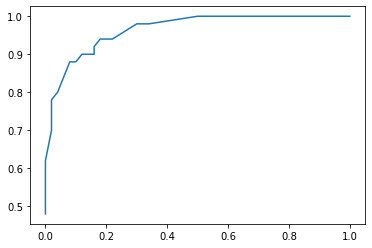

In [64]:
# tpr은 클수록, fpr은 작을수록 좋음
plt.plot(fpr_result,tpr_result)

## Sklearn을 이용하여 계산하기

In [68]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score

In [72]:
# roc_auc_score 의 파라미터 : y 실제, 예측 확률
print("roc :", roc_auc_score(y, reg.predict_proba(X)[:,1]))
print("precision :", precision_score(y, y_pred))
print("recall :", recall_score(y, y_pred))
print("accuracy :", accuracy_score(y, y_pred))


roc : 0.9672000000000001
precision : 0.8979591836734694
recall : 0.88
accuracy : 0.89
